<a href="https://colab.research.google.com/github/YuliiaMan/python_for_ds_tasks/blob/main/Lecture_7_2_%D0%9E%D0%B3%D0%BB%D1%8F%D0%B4_PandasAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PandasAI
[PandasAI](https://github.com/Sinaptik-AI/pandas-ai) - це бібліотека, яка використовує силу датафреймів pandas у поєднанні з найсучаснішими LLM (large language models) для того, щоб користувачі могли виконувати аналіз даних у форматі чату. PandasAI може інтелектуально виявляти закономірності, викиди та відсутні значення, будувати графіки допомагаючи нам приймати рішення на основі даних.

Корисно вміти використовувати такі інструменти та розуміти їх обмеження, аби знати свої сильні сторони як аналітика, а також вміти пришвидшувати свою роботу!

**УВАГА**: Використання цієї бібліотеки - платне, але доволі дешеве, якщо ви не робите автоматичні регулярні запити, а аналізуєте вручну. До того ж, спочатку є пробний період,  і можна спробувати безкоштовно.

## Налаштування
Щоб почати, нам потрібно встановити останню версію PandasAI.

In [ ]:
!pip install -q pandasai

# SmartDataframe

SmartDataframe - це dataframe з бібліотеки pandas (або [polars](https://pola.rs/) - ще швидші дата фрейми), який успадковує всі властивості та методи від `pd.DataFrame`, але також додає до нього можливості для спілкування в форматі чату.

In [ ]:
from pandasai import SmartDataframe

Ви можете створити `SmartDataframe`, імпортуючи з кількох різних джерел даних(датафрейм pandas або polars, csv, xlsx або Google Sheets).

### Імпорт з pandas dataframe

Подивимось, як перетворити pandas dataframe на `SmartDataframe`. Спочатку потрібно імпортувати бібліотеки pandas і створити dataframe.

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    "country": [
        "United States",
        "United Kingdom",
        "France",
        "Germany",
        "Italy",
        "Spain",
        "Canada",
        "Australia",
        "Japan",
        "China",
    ],
    "gdp": [
        19294482071552,
        2891615567872,
        2411255037952,
        3435817336832,
        1745433788416,
        1181205135360,
        1607402389504,
        1490967855104,
        4380756541440,
        14631844184064,
    ],
    "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12],
})

Оскільки PandasAI працює на основі LLM (Large Language Model), вам слід імпортувати LLM, який ви хочете використовувати для вашого випадку.

За замовчуванням, якщо LLM не надано, буде використовуватися BambooLLM.

Ви можете отримати свій безкоштовний API-ключ, зареєструвавшись на https://pandabi.ai (ви також можете налаштувати його у своєму файлі .env чи creds.json)

# Файл `.env`

Файл `.env` — це текстовий файл, у якому зберігаються конфіденційні дані або важливі налаштування, такі як API ключі, паролі, URL баз даних тощо. Його використовують для того, щоб не зберігати ці дані безпосередньо в коді, що допомагає підвищити безпеку проєкту та спрощує його налаштування для різних середовищ (наприклад, для локальної розробки чи продакшену).

**Навіщо потрібен `.env` файл?**

1. **Безпека**: API ключі та інші конфіденційні дані залишаються прихованими від загалу, оскільки `.env` файл можна додати в `.gitignore`, щоб не завантажувати його в публічні репозиторії.
2. **Зручність налаштування**: `.env` дозволяє легко змінювати конфігурацію для різних середовищ, не змінюючи сам код. Це зручно для командної роботи, де кожен розробник може мати власні налаштування.
3. **Легкість у використанні**: Завдяки таким бібліотекам, як `python-dotenv`, ви можете легко завантажувати змінні з `.env` у свій код, не хардкодячи їх.

### Створення та використання `.env`:

1. **Створюємо файл `.env`**:
   - У кореневій директорії вашого проєкту створіть файл з назвою `.env`.

2. **Додаємо конфіденційні дані**:
   - Наприклад, для зберігання API ключа, додайте його у форматі:
     ```plaintext
     PANDASAI_API_KEY=ваш_api_ключ_тут
     ```

3. **Використовуємо `.env` з Python**:
   
Спочатку встановіть пакет `python-dotenv`, якщо він ще не встановлений:


In [ ]:
!pip install -q python-dotenv

Потім завантажте змінні з `.env` у вашому Python-скрипті:

In [ ]:
from dotenv import load_dotenv
import os

# Завантаження змінних середовища з файлу .env
load_dotenv()

# Доступ до API ключа
api_key = os.getenv("PANDASAI_API_KEY")

In [ ]:
import os

os.environ['PANDASAI_API_KEY'] = api_key

In [ ]:
?SmartDataframe

In [ ]:
df

,country,gdp,happiness_index
0,United States,19294482071552,6.94
1,United Kingdom,2891615567872,7.16
2,France,2411255037952,6.66
3,Germany,3435817336832,7.07
4,Italy,1745433788416,6.38
5,Spain,1181205135360,6.40
6,Canada,1607402389504,7.23
7,Australia,1490967855104,7.22
8,Japan,4380756541440,5.87
9,China,14631844184064,5.12


In [ ]:
sdf = SmartDataframe(df)

In [ ]:
sdf

Тепер, коли ми створили екземпляр LLM, ми нарешті можемо створити екземпляр `SmartDataframe`.

Тепер ви можете запитувати його природною мовою.

In [ ]:
sdf.chat("Return the top 5 countries by GDP")

,country,gdp,happiness_index
0,United States,19294482071552,6.94
9,China,14631844184064,5.12
8,Japan,4380756541440,5.87
3,Germany,3435817336832,7.07
1,United Kingdom,2891615567872,7.16


In [ ]:
sdf.chat("What's the sum of the gdp of the 2 unhappiest countries?")

19012600725504

In [ ]:
df.sort_values('happiness_index').head(2).gdp.sum()

19012600725504

In [ ]:
print(sdf.last_code_generated)

data = {'country': ['United States', 'Canada', 'United Kingdom'], 'gdp': [2726725787, 6440707972, 9833860673], 'happiness_index': [5.87, 6.94, 6.4]}
df = dfs[0]
df_sorted = df.sort_values(by='happiness_index')
sum_gdp = df_sorted.head(2)['gdp'].sum()
result = {'type': 'number', 'value': sum_gdp}


### Побудова графіка

Ви також можете використовувати PandasAI для легкого побудови графіка.

'/content/exports/charts/temp_chart.png'

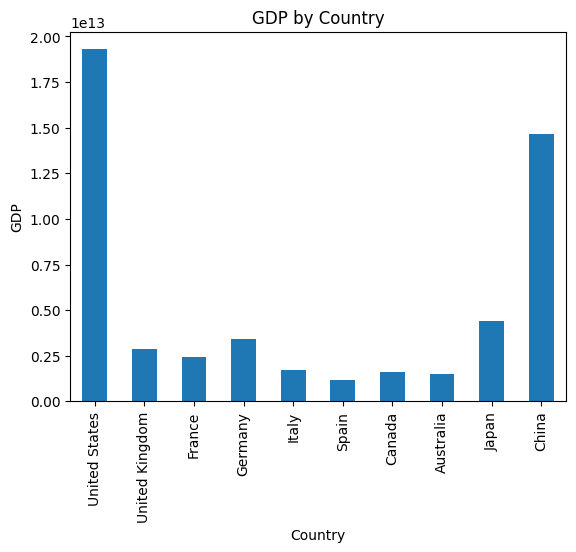

In [ ]:
sdf.chat("Plot a chart of the gdp by country")

Ви також можете надати додаткові інструкції. Наприклад, уявіть, що ви хочете використовувати різні кольори для кожної стовпця. Вам просто потрібно запитати у PandasAI:

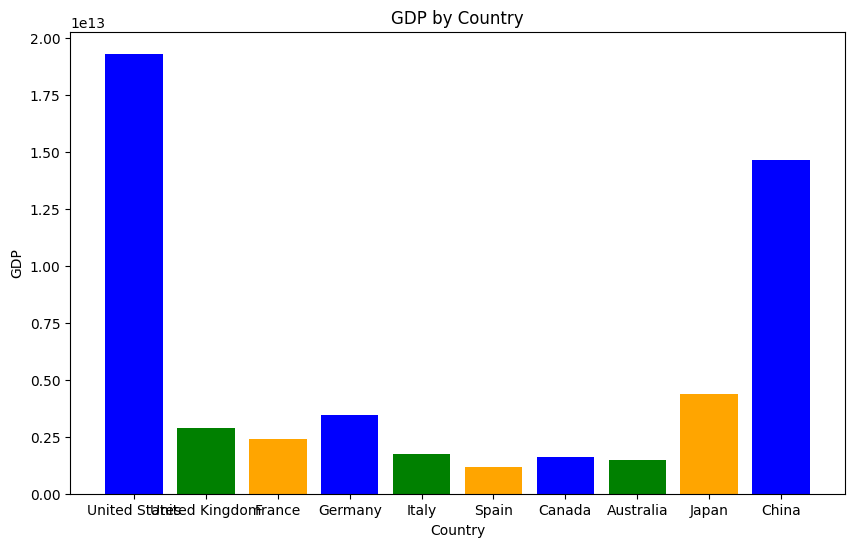

'/content/exports/charts/temp_chart.png'

In [ ]:
sdf.chat("Plot a histogram of the gdp by country, using a different color for each bar")

In [ ]:
print(sdf.last_code_generated)

data = {'country': ['United States', 'Canada', 'United Kingdom'], 'gdp': [2726725787, 6440707972, 9833860673], 'happiness_index': [5.87, 6.94, 6.4]}
df = dfs[0]
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange']
plt.bar(df['country'], df['gdp'], color=colors)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('GDP by Country')
plt.show()
result = {'type': 'plot', 'value': '/content/exports/charts/temp_chart.png'}


# SmartDatalake

Іноді вам може знадобитися працювати з кількома датафреймами одночасно, дозволяючи LLM (великій мовній моделі) організувати, який з них використовувати для відповіді на ваші запити. У таких випадках замість використання `SmartDataframe` вам слід використовувати `SmartDatalake`.

Концепція дуже схожа на `SmartDataframe`, але замість того, щоб приймати лише 1 df (датафрейм) як вхід, вона може приймати кілька.

In [ ]:
from pandasai import SmartDatalake

Наприклад, у цьому прикладі нам надано 2 різні датафрейми (dataframes).
У першому з них для кожного працівника вказано ідентифікатор працівника (employee id), ім'я та відділ.
У другому, натомість, надано ідентифікатор працівника та зарплату для кожного працівника.

Запитуючи PandasAI, він об'єднає 2 різні датафрейми за ідентифікатором і визначить ім'я того, хто отримує найбільшу зарплату.

In [ ]:
employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

lake = SmartDatalake([employees_df, salaries_df])
lake.chat("What's the name of the employee that gets paid the most?")

'The employee that gets paid the most is Olivia.'

Ось приклад коду, який генерується:

In [ ]:
print(lake.last_code_executed)

merged_df = pd.merge(dfs[0], dfs[1], on='EmployeeID')
highest_salary_row = merged_df.loc[merged_df['Salary'].idxmax()]
employee_highest_salary = highest_salary_row['Name']
result = {'type': 'string', 'value': f'The employee that gets paid the most is {employee_highest_salary}.'}


Добре, у цьому випадку це було легко: обидві таблиці мають спільне значення, яке називається `EmployeeID`, вірно?

Давайте спробуємо щось більш складне.

In [ ]:
users_df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5],
        "name": ["John", "Emma", "Liam", "Olivia", "William"]
    }
)
users = SmartDataframe(users_df, name="users")

photos_df = pd.DataFrame(
    {
        "id": [31, 32, 33, 34, 35],
        "user_id": [1, 1, 2, 4, 5]
    }
)
photos = SmartDataframe(photos_df, name="photos")

lake = SmartDatalake([users, photos])
lake.chat("How many photos has been uploaded by John?")

1

У цьому випадку ми надали для кожного df ім'я таблиці, щоб LLM мав певний контекст і міг краще виконувати з'єднання. Як ви можете бачити на наведеному нижче прикладі, йому вдалося зрозуміти, яке з'єднання потрібно виконати. Насправді, користувач "John" має насправді 2 фотографії.

In [ ]:
print(lake.last_code_executed)

df1_data = {'id': [3, 2, 5], 'name': ['Olivia', 'Emma', 'Liam']}
df2_data = {'id': [32, 31, 33], 'user_id': [2, 4, 1]}
df1 = dfs[0]
df2 = dfs[1]
john_photos = df2[df2['user_id'] == 2].shape[0]
result = {'type': 'number', 'value': john_photos}


# Різні LLM

Хоча на даний момент рекомендованими моделями є OpenAI GPT3.5 та GPT4, ми також підтримуємо інші моделі, такі як AzureOpenAI.

Ви можете використовувати їх наступним чином:

In [ ]:
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from pandasai.llm import AzureOpenAI
from pandasai.llm import GoogleVertexAI

openai_llm = OpenAI(
    api_token="my-openai-api-key",
)

azure_llm = AzureOpenAI(
    api_token="my-azure-openai-api-key",
    azure_endpoint="my-azure-openai-api-endpoint",
    api_version="2023-05-15",
    deployment_name="my-deployment-name"
)

vertexai_llm = GoogleVertexAI(
  project_id="generative-ai-training",
  location="us-central1",
  model="text-bison@001"
)

df1 = SmartDataframe(df, config={"llm": openai_llm})
df2 = SmartDataframe(df, config={"llm": azure_llm})
df3 = SmartDataframe(df, config={"llm": vertexai_llm})

print(df1.chat("Which country has the highest GDP?"))
print(df2.chat("Which one is the unhappiest country?"))
print(df3.chat("What is the sum of the GDP of the 2 unhappiest countries?"))

## LangChain LLMs

В деяких випадках ви можете захотіти використовувати LLM (Large Language Models) LangChain замість цього.

In [ ]:
!pip install -q pandasai[langchain] langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00


Тоді ви можете використовувати їх так, ніби це LLM (Large Language Models) від PandasAI.

Згенерувати OpenAI API можна [тут](https://platform.openai.com/settings/organization/api-keys).


In [ ]:
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

'/content/exports/charts/temp_chart.png'

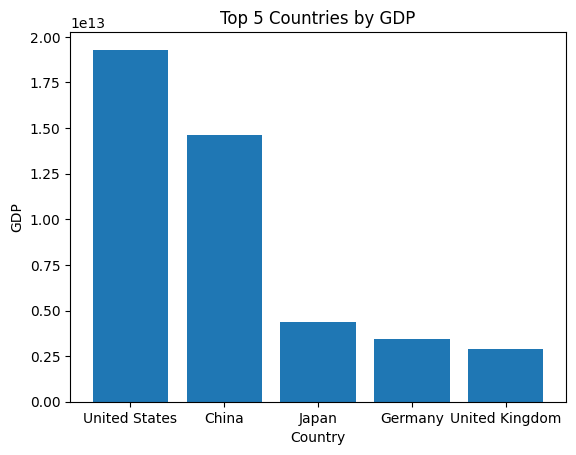

In [ ]:
from pandasai import SmartDataframe
from langchain_openai import OpenAI
# from langchain.llms import Anthropic
# from langchain.llms import LlamaCpp

langchain_llm = OpenAI(max_tokens=1000, model='gpt-4o-mini')
langchain_sdf = SmartDataframe(df, config={"llm": langchain_llm})
langchain_sdf.chat("Which are the top 5 countries by GPD?")

In [ ]:
print(langchain_sdf.last_code_generated)

top_5_gdp = dfs[0].nlargest(5, 'gdp')
plt.bar(top_5_gdp['country'], top_5_gdp['gdp'])
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('Top 5 Countries by GDP')
plt.savefig('/content/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/content/exports/charts/temp_chart.png'}


In [ ]:
print(langchain_sdf.last_code_executed)

top_5_gdp = dfs[0].nlargest(5, 'gdp')
plt.bar(top_5_gdp['country'], top_5_gdp['gdp'])
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('Top 5 Countries by GDP')
plt.savefig('/content/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/content/exports/charts/temp_chart.png'}


# Конектори

PandasAI надає ряд конекторів, які дозволяють підключатися до різних джерел даних. Ці конектори розроблені так, щоб їх було легко використовувати, навіть якщо ви не знайомі з джерелом даних або з PandasAI.

Щоб використовувати конектор, спочатку потрібно встановити необхідні залежності. Ви можете зробити це, виконавши наступну команду:

In [ ]:
!pip install -q pandasai[connectors]

In [ ]:
from pandasai.connectors import MySQLConnector, PostgreSQLConnector

# With a MySQL database
loan_connector = MySQLConnector(
    config={
        "host": "localhost",
        "port": 3306,
        "database": "mydb",
        "username": "root",
        "password": "root",
        "table": "loans",
        "where": [
            # this is optional and filters the data to
            # reduce the size of the dataframe
            ["loan_status", "=", "PAIDOFF"],
        ],
    }
)

# With a PostgreSQL database
payment_connector = PostgreSQLConnector(
    config={
        "host": "localhost",
        "port": 5432,
        "database": "mydb",
        "username": "root",
        "password": "root",
        "table": "payments",
        "where": [
            # this is optional and filters the data to
            # reduce the size of the dataframe
            ["payment_status", "=", "PAIDOFF"],
        ],
    }
)

df_connector = SmartDatalake([loan_connector, payment_connector])
response = df_connector.chat("How many loans from the United states?")
print(response)

In [ ]:
from pandasai.connectors.yahoo_finance import YahooFinanceConnector
from pandasai import SmartDataframe

yahoo_connector = YahooFinanceConnector("NVDA")
df = SmartDataframe(yahoo_connector)

response = df.chat("What is the closing price for yesterday?")
print(response)

ERROR:yfinance:NVDA: Period '3d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']


0.0376177653670311


ERROR:yfinance:NVDA: Period '3d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']


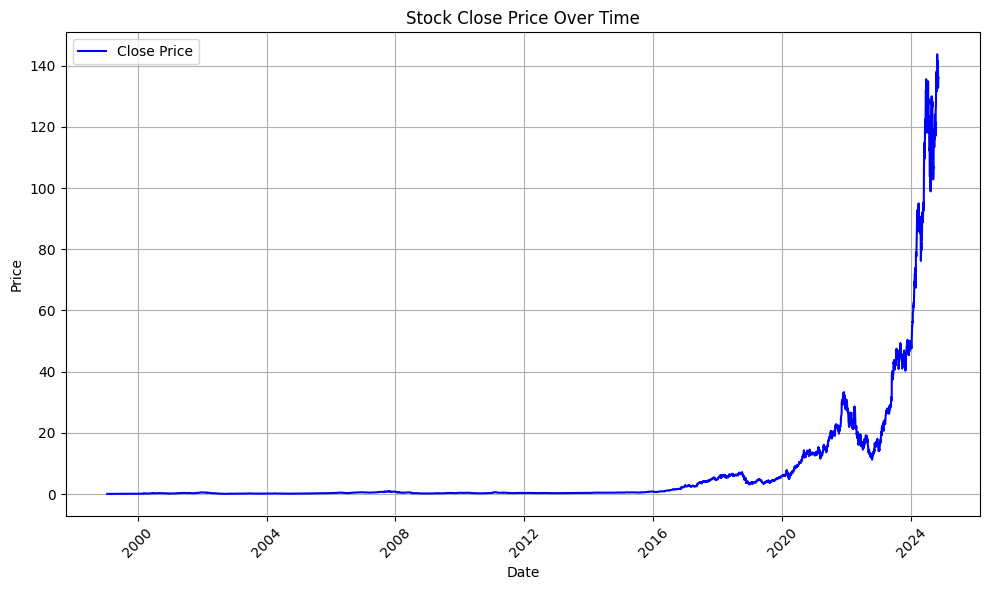

In [ ]:
yahoo_connector = YahooFinanceConnector("NVDA")

df_connector = SmartDataframe(yahoo_connector)
response = df_connector.chat("Plot the chart of the stock")

# Агент

Агент дуже схожий на SmartDatalake, оскільки приймає кілька датафреймів або конекторів. Однак він має пам'ять, тому може використовуватися для багатоповторних розмов.

ERROR:yfinance:TSLA: Period '3d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']


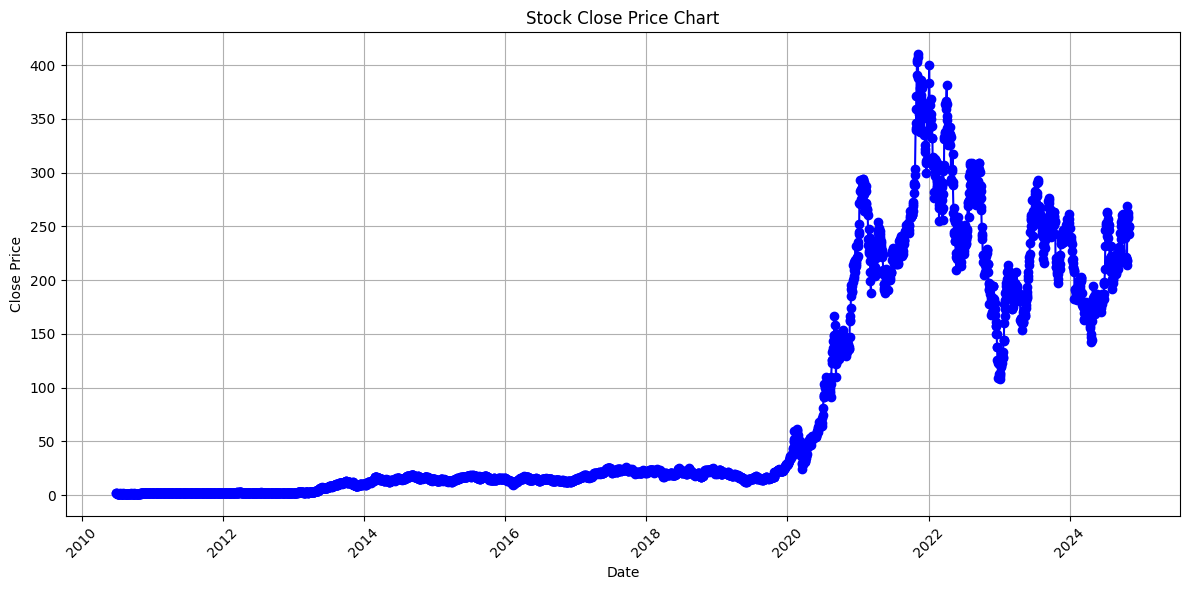

In [ ]:
from pandasai import Agent

yahoo_connector = YahooFinanceConnector("TSLA")

agent = Agent(yahoo_connector)
response = agent.chat("Plot the chart of the stock close price")

Тепер давайте спробуємо з наступним запитанням.

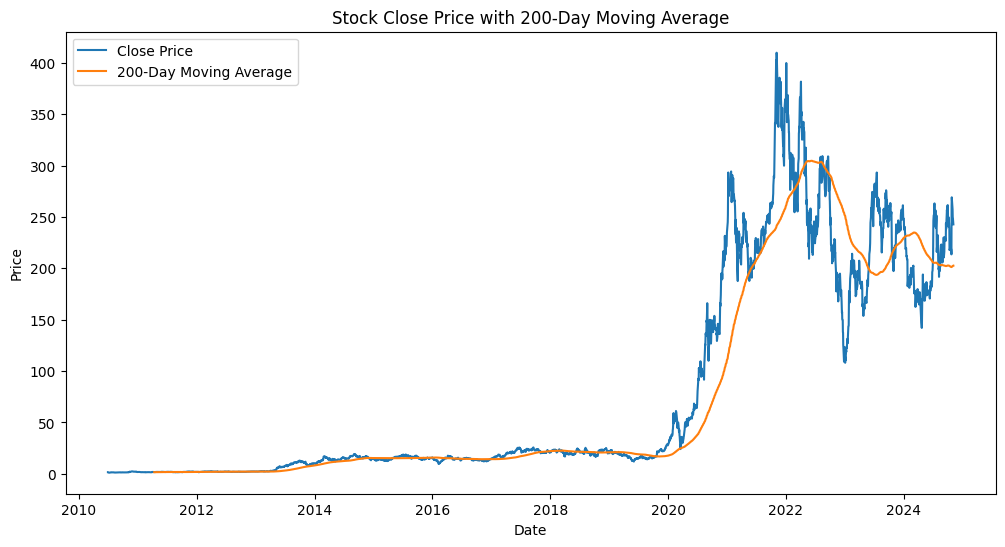

In [ ]:
result = agent.chat("Can you add the moving average at 200 days?")

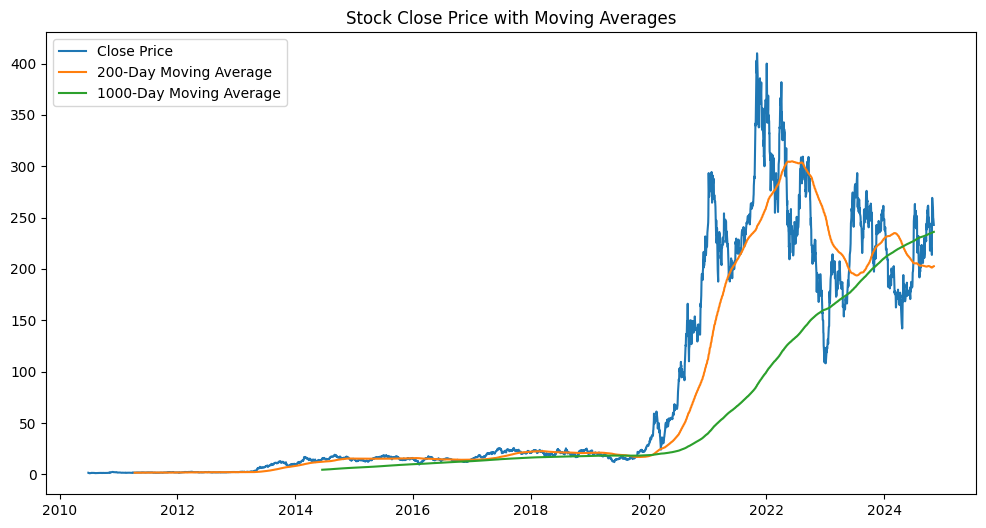

In [ ]:
result = agent.chat("Can you also add the moving average at 1000 days?")

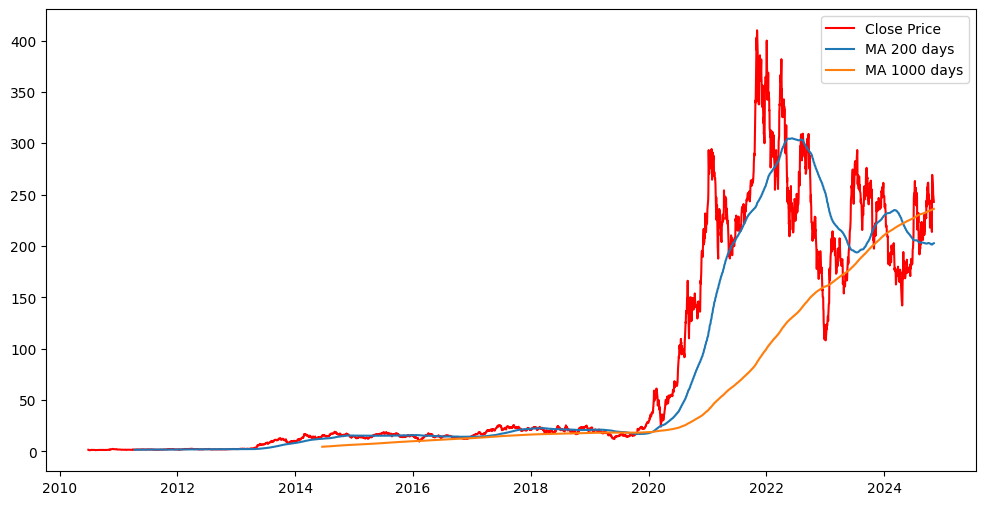

In [ ]:
result = agent.chat("Can you make the price line red?")

Ви можете знайти більше інформації про конектори (connectors) (та багато інших конекторів) тут: https://docs.pandas-ai.com/en/latest/connectors/